/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


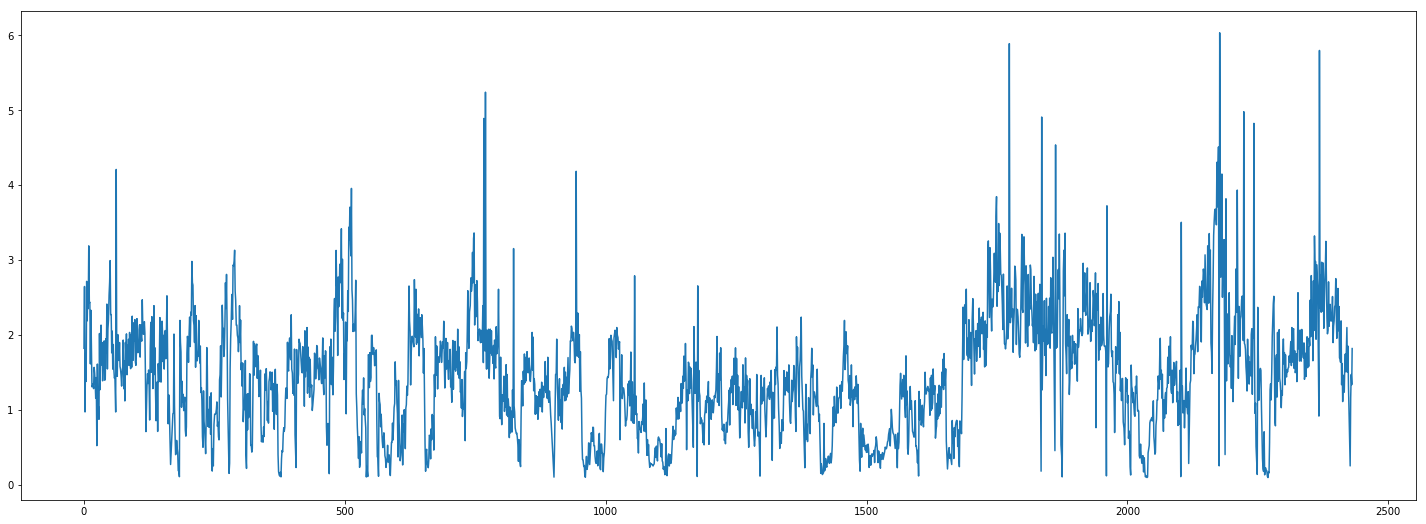

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np


file = pandas.read_csv('train.oslo-vestby-report.2011-02-14_0644CET.log', names = ["band"], sep = '\t')

dataset = file["band"][:]
dataset = dataset[:]
plt.figure(figsize=(25,9))
plt.plot(dataset)
plt.show()

In [2]:
dataset = np.asarray(dataset)

dataset.shape
dataset = np.vstack(dataset)
dataset.shape

(2320, 1)

In [3]:
model_mse = keras.models.load_model('model_mse.h5')

In [4]:
scaler = MinMaxScaler(feature_range=(0, 100))
dataset = scaler.fit_transform(dataset)

In [5]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
look_back = 1
testX, testY = create_dataset(dataset, look_back)
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY_inverse = scaler.inverse_transform([testY])

In [7]:
testX.shape

(2318, 1, 1)

In [8]:
testPredict = model_mse.predict(testX)
testPredict_mse = scaler.inverse_transform(testPredict)

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict_mse[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.57 RMSE


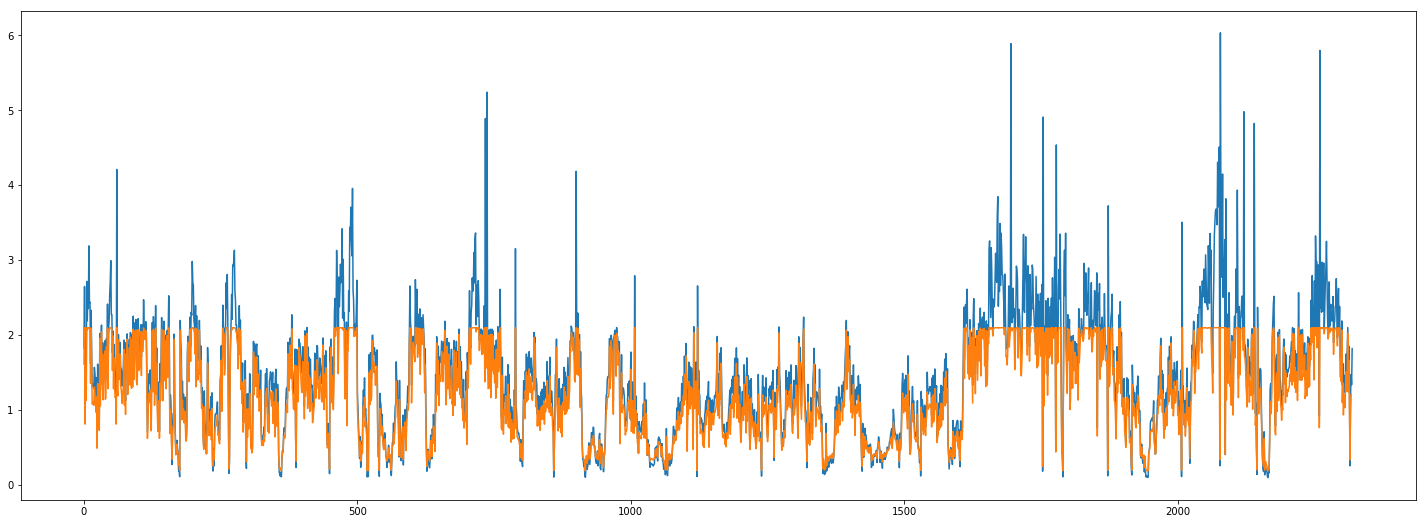

In [9]:



# plot baseline and predictions
plt.figure(figsize=(25,9))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredict_mse)
plt.show()